<a href="https://colab.research.google.com/github/Abhishekravindran/Computer_vision_projects/blob/main/Computervision_pose_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recognition of gestures and actions


## Detecting body points

### Importing the libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

### Loading the image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [6]:
image = cv2.imread('/content/drive/MyDrive/Images/megan.jpg')

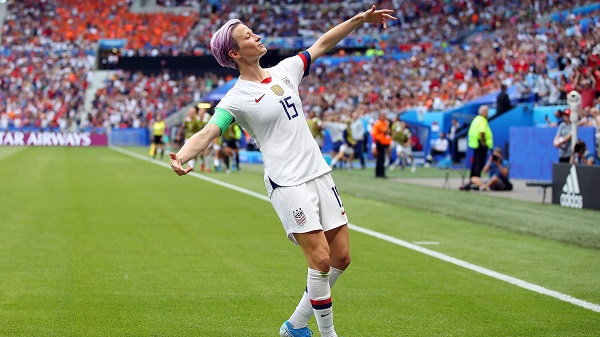

In [7]:
cv2_imshow(image)

In [8]:
image.shape, image.shape[0] * image.shape[1] * 3

((337, 600, 3), 606600)

In [9]:
type(image)

numpy.ndarray

In [10]:
# Mean subtraction: https://www.pyimagesearch.com/2017/11/06/deep-learning-opencvs-blobfromimage-works/
image_blob = cv2.dnn.blobFromImage(image = image, scalefactor = 1.0 / 255,
                                   size = (image.shape[1], image.shape[0]))

In [11]:
type(image_blob), image_blob.shape # batch

(numpy.ndarray, (1, 3, 337, 600))

### Loading the pre-trained neural network

- Caffe Deep Learning framework: https://caffe.berkeleyvision.org/

In [12]:
network = cv2.dnn.readNetFromCaffe('/content/drive/MyDrive/Weights/pose_deploy_linevec_faster_4_stages.prototxt',
                                   '/content/drive/MyDrive/Weights/pose_iter_160000.caffemodel')

In [13]:
network.getLayerNames()

['conv1_1',
 'relu1_1',
 'conv1_2',
 'relu1_2',
 'pool1_stage1',
 'conv2_1',
 'relu2_1',
 'conv2_2',
 'relu2_2',
 'pool2_stage1',
 'conv3_1',
 'relu3_1',
 'conv3_2',
 'relu3_2',
 'conv3_3',
 'relu3_3',
 'conv3_4',
 'relu3_4',
 'pool3_stage1',
 'conv4_1',
 'relu4_1',
 'conv4_2',
 'relu4_2',
 'conv4_3_CPM',
 'relu4_3_CPM',
 'conv4_4_CPM',
 'relu4_4_CPM',
 'conv5_1_CPM_L1',
 'relu5_1_CPM_L1',
 'conv5_1_CPM_L2',
 'relu5_1_CPM_L2',
 'conv5_2_CPM_L1',
 'relu5_2_CPM_L1',
 'conv5_2_CPM_L2',
 'relu5_2_CPM_L2',
 'conv5_3_CPM_L1',
 'relu5_3_CPM_L1',
 'conv5_3_CPM_L2',
 'relu5_3_CPM_L2',
 'conv5_4_CPM_L1',
 'relu5_4_CPM_L1',
 'conv5_4_CPM_L2',
 'relu5_4_CPM_L2',
 'conv5_5_CPM_L1',
 'conv5_5_CPM_L2',
 'concat_stage2',
 'Mconv1_stage2_L1',
 'Mrelu1_stage2_L1',
 'Mconv1_stage2_L2',
 'Mrelu1_stage2_L2',
 'Mconv2_stage2_L1',
 'Mrelu2_stage2_L1',
 'Mconv2_stage2_L2',
 'Mrelu2_stage2_L2',
 'Mconv3_stage2_L1',
 'Mrelu3_stage2_L1',
 'Mconv3_stage2_L2',
 'Mrelu3_stage2_L2',
 'Mconv4_stage2_L1',
 'Mrelu4_sta

In [14]:
len(network.getLayerNames())

127

### Predicting body points

In [15]:
network.setInput(image_blob)
output = network.forward()

In [16]:
output.shape

(1, 44, 43, 75)

In [17]:
position_width = output.shape[3]
position_heigth = output.shape[2]

In [18]:
position_width

75

In [19]:
(image.shape[1] * 28) / 75

224.0

In [20]:
# minMaxLoc: https://docs.opencv.org/master/d2/de8/group__core__array.html#gab473bf2eb6d14ff97e89b355dac20707
num_points = 15
points = []
threshold = 0.1
for i in range(num_points):
  #print(i)
  confidence_map = output[0, i, :, :]
  #print(confidence_map)
  #print(len(confidence_map))
  _, confidence, _, point = cv2.minMaxLoc(confidence_map)
  #print(confidence)
  #print(point)

  x = int((image.shape[1] * point[0]) / position_width)
  y = int((image.shape[0] * point[1]) / position_heigth)
  #print(x,y)
  if confidence > threshold:
    cv2.circle(image, (x, y), 5, (0,255,0), thickness = -1)
    cv2.putText(image, '{}'.format(i), (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255))
    points.append((x,y))
  else:
    points.append(None)

In [21]:
points

[(224, 23),
 (248, 62),
 (232, 94),
 (208, 125),
 (176, 148),
 (280, 62),
 (320, 39),
 (360, 15),
 (288, 180),
 (320, 250),
 (320, 321),
 (312, 164),
 (336, 250),
 (296, 305),
 (280, 125)]

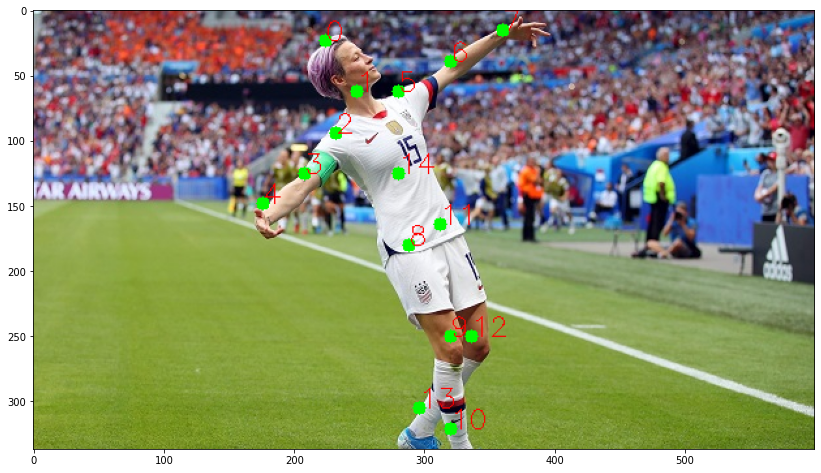

In [22]:
plt.figure(figsize=(14,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));

In [23]:
point_connections = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7],[1,14],
                     [14,8], [8,9], [9,10], [14,11], [11,12], [12,13]]

In [24]:
point_connections

[[0, 1],
 [1, 2],
 [2, 3],
 [3, 4],
 [1, 5],
 [5, 6],
 [6, 7],
 [1, 14],
 [14, 8],
 [8, 9],
 [9, 10],
 [14, 11],
 [11, 12],
 [12, 13]]

In [25]:
for connection in point_connections:
  #print(connection)
  partA = connection[0]
  partB = connection[1]
  #print(partA, partB)
  if points[partA] and points[partB]:
    cv2.line(image, points[partA], points[partB], (255,0,0))

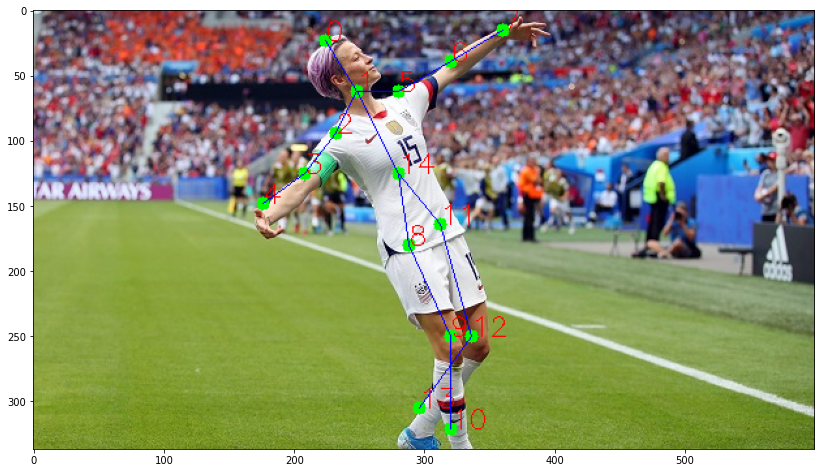

In [26]:
plt.figure(figsize=(14,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));

## Detecting movements (arms above the head)

### Arms above the head in images

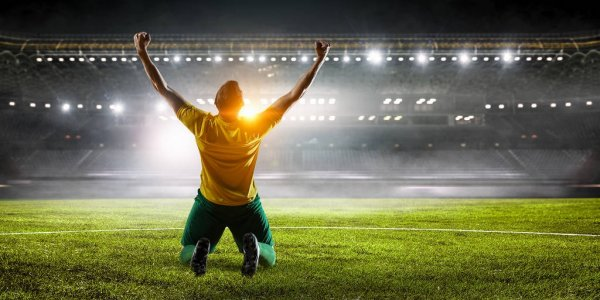

In [27]:
image2 = cv2.imread('/content/drive/MyDrive/computer vision/Computer Vision Masterclass/Images/player.jpg')
cv2_imshow(image2)

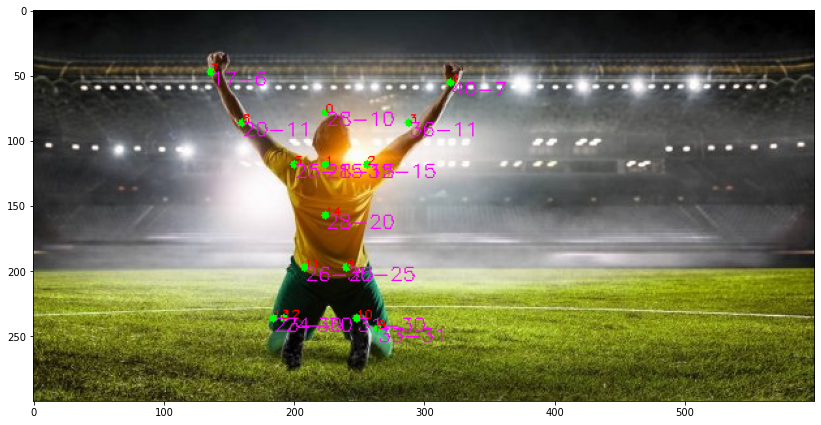

In [28]:
image2 = cv2.imread('/content/drive/MyDrive/computer vision/Computer Vision Masterclass/Images/player.jpg')
image_blob2 = cv2.dnn.blobFromImage(image = image2, scalefactor = 1.0 / 255, size = (image2.shape[1], image2.shape[0]))
network.setInput(image_blob2)
output2 = network.forward()
position_width = output2.shape[3]
position_height = output2.shape[2]
num_points = 15
points = []
threshold = 0.1
for i in range(num_points):
  confidence_map = output2[0, i, :, :]
  _, confidence, _, point = cv2.minMaxLoc(confidence_map) 
  x = int((image2.shape[1] * point[0]) / position_width)
  y = int((image2.shape[0] * point[1]) / position_height)
  
  if confidence > threshold:
    cv2.circle(image2, (x, y), 3, (0,255,0), thickness = -1)
    cv2.putText(image2, "{}".format(i), (x, y), cv2.FONT_HERSHEY_SIMPLEX, .3, (0, 0, 255))
    cv2.putText(image2, '{}-{}'.format(point[0], point[1]), (x, y + 10), cv2.FONT_HERSHEY_SIMPLEX, .5, (255,0,255))
    points.append((x, y))
  else:
    points.append(None)

plt.figure(figsize = [14,10])
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB));

In [29]:
def verify_arms_up(points):
  head, right_wrist, left_wrist = 0, 0, 0
  for i, point in enumerate(points):
    #print(i, point)
    if i == 0:
      head = point[1]
    elif i == 4:
      right_wrist = point[1]
    elif i == 7:
      left_wrist = point[1]
  
  #print(head, right_wrist, left_wrist)
  if right_wrist < head and left_wrist < head:
    return True
  else:
    return False

In [30]:
verify_arms_up(points) #detected correctly or not

True

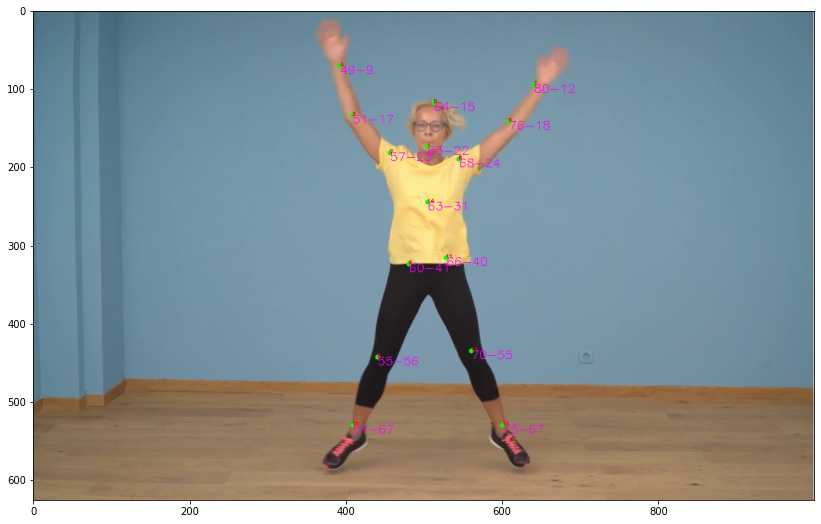

In [31]:
image = cv2.imread('/content/drive/MyDrive/computer vision/Computer Vision Masterclass/Images/jump.jpg')
image_blob = cv2.dnn.blobFromImage(image = image, scalefactor = 1.0 / 255, size = (image.shape[1], image.shape[0]))
network.setInput(image_blob)
output = network.forward()
position_width = output.shape[3]
position_height = output.shape[2]
num_points = 15
points = []
threshold = 0.1
for i in range(num_points):
  confidence_map = output[0, i, :, :]
  _, confidence, _, point = cv2.minMaxLoc(confidence_map)  
  x = int((image.shape[1] * point[0]) / position_width)
  y = int((image.shape[0] * point[1]) / position_height)
  
  if confidence > threshold:
    cv2.circle(image, (x, y), 3, (0,255,0), thickness = -1)
    cv2.putText(image, "{}".format(i), (x, y), cv2.FONT_HERSHEY_SIMPLEX, .2, (0, 0, 255))
    cv2.putText(image, "{}-{}".format(point[0], point[1]), (x, y + 10), cv2.FONT_HERSHEY_SIMPLEX, .5, (255, 0, 255))
    points.append((x, y))
  else:
    points.append(None)

plt.figure(figsize = [14,10])
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));

In [32]:
def verify_legs_apart(points):
  left_hip, rigth_hip = 0, 0
  left_ankle, right_ankle = 0, 0

  for i, point in enumerate(points):
    if i == 11:
      left_hip = point[0]
    elif i == 8:
      rigth_hip = point[0]
    elif i == 13:
      left_ankle = point[0]
    elif i == 10:
      rigth_ankle = point[0]

  if (left_ankle > left_hip) and (rigth_ankle < rigth_hip):
    return True
  else:
    return False

In [33]:
verify_legs_apart(points)#checking few thresholds for verification of pose

True